Text(0, 0.5, '$E/E_0 (F_p/F_{p0})$')

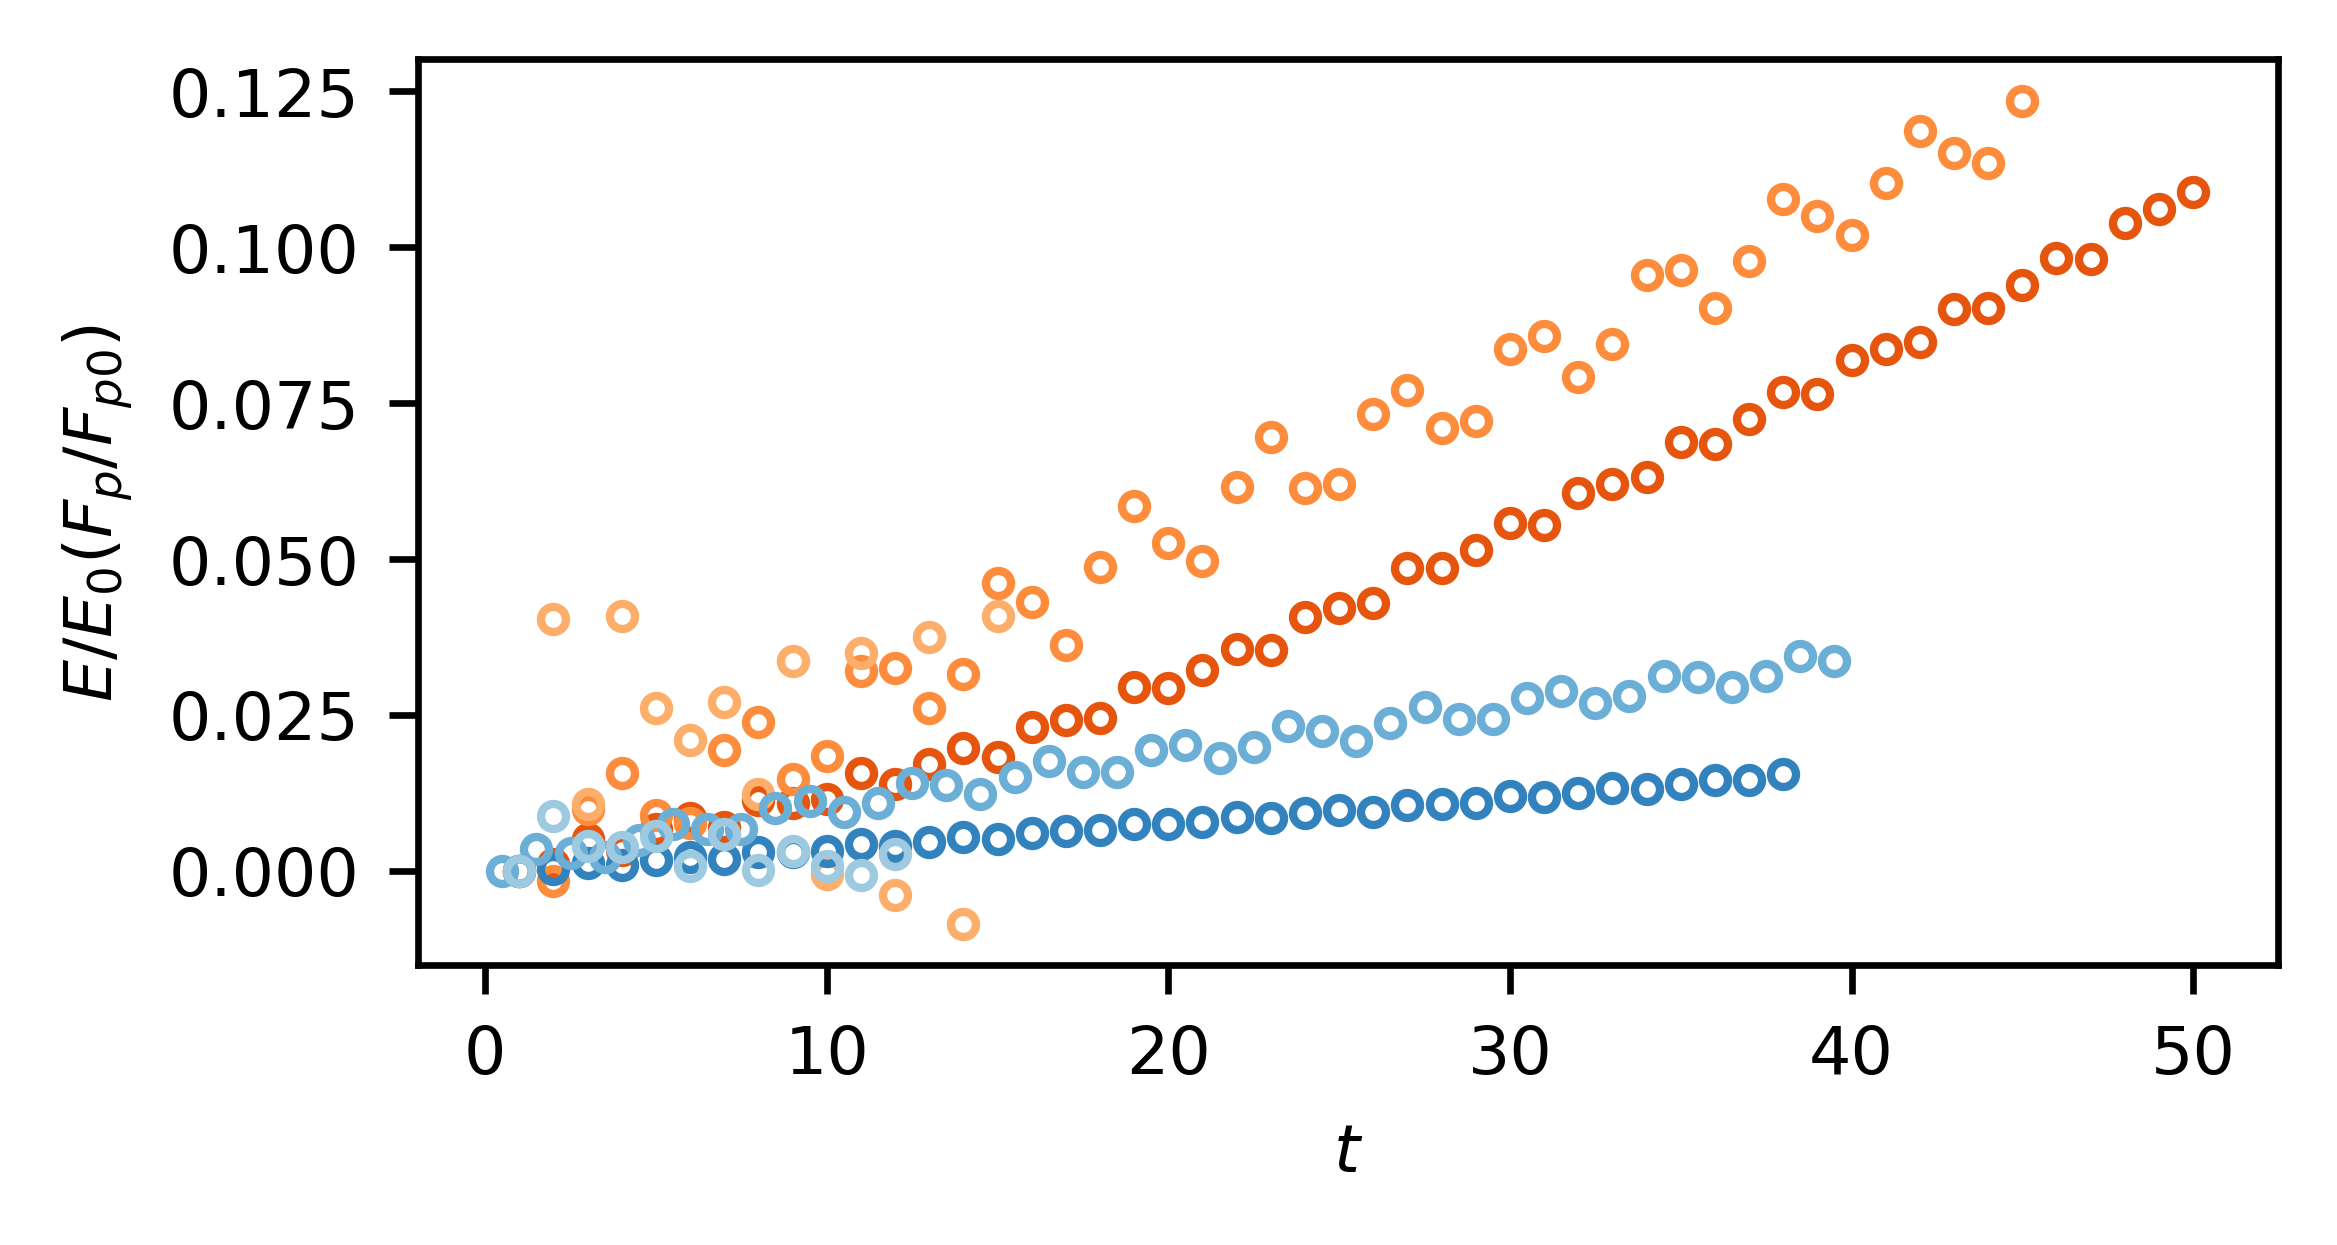

In [14]:
"""Wave growth plot"""

fig = plt.figure(figsize=[4,2]); ax = plt.gca()

"""Plot the rms eta or the Fp"""
def plotE(case, markercolor=plt.get_cmap('tab20c')(4)):
    T = 2*np.pi/case.wave.omega     
    plt.plot(case.t, case.Erms*100*case.g-case.Erms[0]*100*case.g, marker = 'o', mfc='none',
             label=r'$u_*/c=%.2f$ rms' %(case.ustar/case.wave.c), lw=0, markersize=3, color=markercolor, alpha = 1) 
#     plt.plot(case.t, case.Ep*1000*case.g-case.Ep[0]*1000*case.g, color=markercolor, marker = '^', mfc='none',
#              markeredgewidth=1, lw=0, markersize=3, label=r'$u_*/c=%.2f$ peak' %(case.ustar/case.wave.c))
#     plt.plot(case.t/T, case.Erms/case.Erms[0], marker = 'o', mfc='none',
#              label=r'$u_*/c=%.2f$ rms' %(case.ustar/case.wave.c), lw=0, markersize=3, color=markercolor, alpha = 1) 
#     plt.plot(case.t/T, case.Ep/case.Ep[0], color=markercolor, marker = '^', mfc='none',
#              markeredgewidth=1, lw=0, markersize=3, label=r'$u_*/c=%.2f$ peak' %(case.ustar/case.wave.c))

"""Fit an exponential"""
def fit_exponential(case, linecolor=plt.get_cmap('tab20c')(4)):
    T = 2*np.pi/case.wave.omega
    case.wa, wb = np.polyfit(case.t/T, np.log(case.Erms/case.Erms[0]), 1)
#     plt.plot(case.t, np.exp(case.wa*case.t/T+wb), color=linecolor, alpha = 0.5)
    plt.plot(case.t/T, np.exp(case.wa*case.t/T+wb), color=linecolor, alpha = 0.5)
    print(case.wa)

colorscheme = (plt.get_cmap('tab20c')(4),plt.get_cmap('tab20c')(5),plt.get_cmap('tab20c')(6),
               plt.get_cmap('tab20c')(0),plt.get_cmap('tab20c')(1),plt.get_cmap('tab20c')(2))
for (case, color) in zip((case1,case2,case3,case4,case5,case6), colorscheme):
    plotE(case, color)
#     fit_exponential(case, color)


# ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
# ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)
plt.xlabel(r'$t$'); plt.ylabel(r'$E/E_0 (F_p/F_{p0})$')
# plt.ylim([0.95,2.15]); plt.xlim([-1,35])
# plt.xlim([-1,60])
# plt.legend(loc='upper right')

0.04182977404207998
0.00792400697650685
-9.153643445894328e-05
0.03358674920053482
0.009217872506149433
-0.0005088194227656762


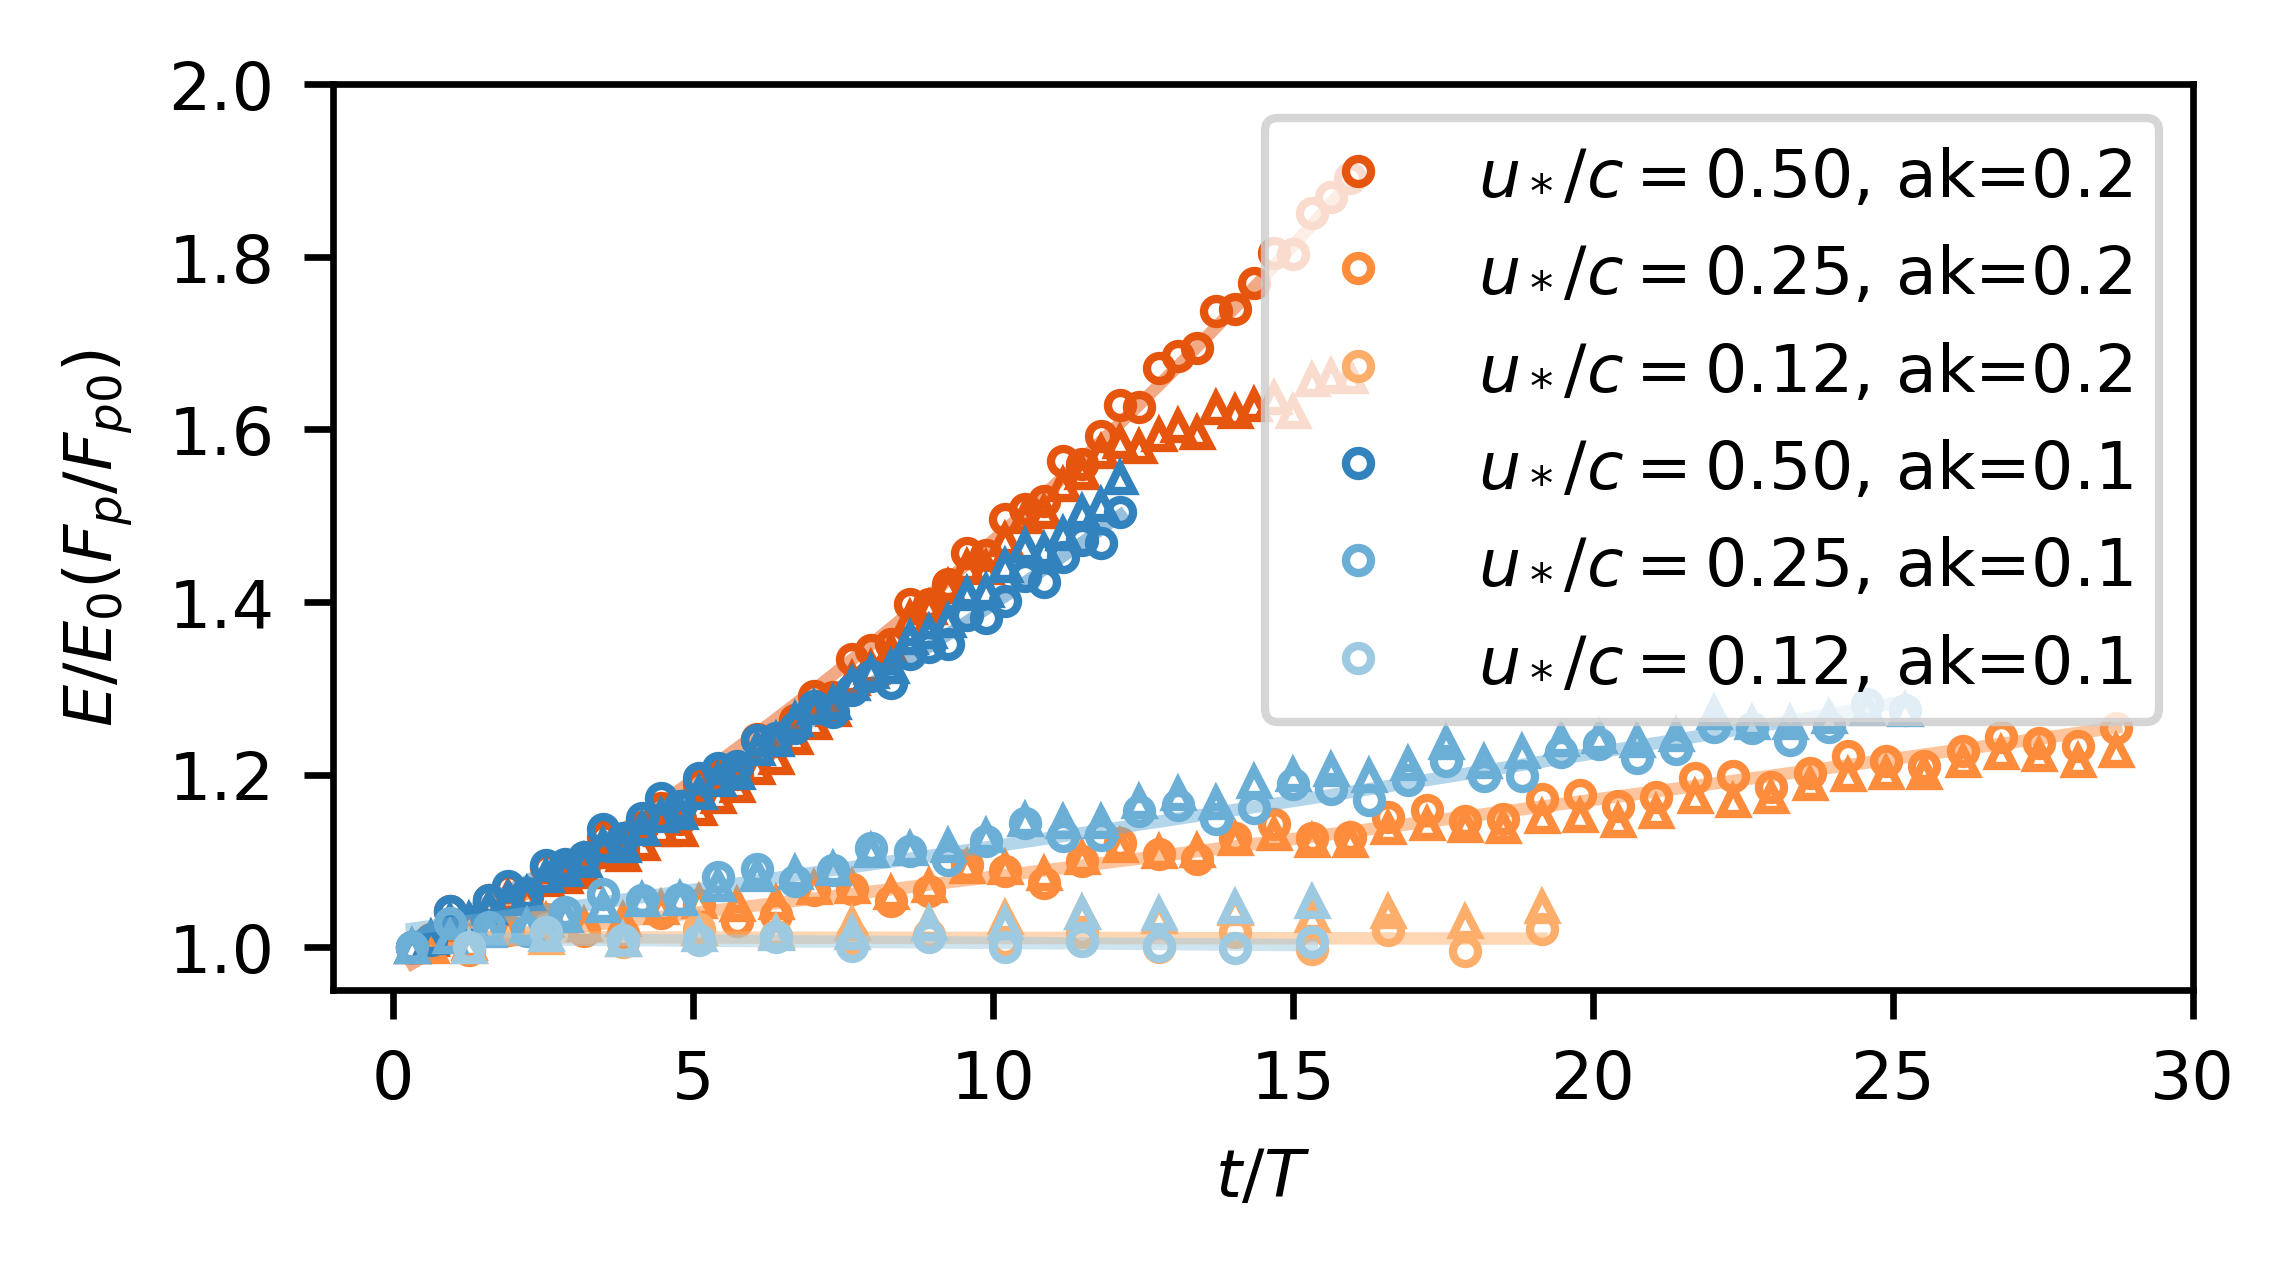

In [15]:
"""Wave growth plot"""

fig = plt.figure(figsize=[4,2]); ax = plt.gca()

def plotE(case, markercolor=plt.get_cmap('tab20c')(4)):
    T = 2*np.pi/case.wave.omega     
    plt.plot(case.t/T, case.Erms/case.Erms[0], marker = 'o', mfc='none',
             label=r'$u_*/c=%.2f$, ak=%g' %(case.ustar/case.wave.c, case.ak), lw=0, markersize=3, color=markercolor, alpha = 1) 
    plt.plot(case.t/T, case.Ep/case.Ep[0], color=markercolor, marker = '^', mfc='none',
             markeredgewidth=1, lw=0, markersize=3)

colorscheme = (plt.get_cmap('tab20c')(4),plt.get_cmap('tab20c')(5),plt.get_cmap('tab20c')(6),
               plt.get_cmap('tab20c')(0),plt.get_cmap('tab20c')(1),plt.get_cmap('tab20c')(2))
for (case, color) in zip((case1,case2,case3,case4,case5,case6), colorscheme):
    plotE(case, color)
    fit_exponential(case, color)


# ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
# ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)
plt.xlabel(r'$t/T$'); plt.ylabel(r'$E/E_0 (F_p/F_{p0})$'); plt.ylim([0.95,2]); plt.xlim([-1,30])
plt.legend(loc='upper right')

In [51]:
""" Finding p phase and p amplitude """
def find_pphase (interface):
    p = np.average(interface.p, axis=0)/case.tau0
    p_onecircle = np.average((p[0:128], p[128:256], p[256:384], p[384:512]), axis=0)
    analytic_signal = hilbert(p_onecircle)
    interface.pphase = np.angle(analytic_signal)
    interface.pidx = abs(interface.pphase).argmin() # 0 corresponds to crest, -pi/pi corresponds to trough
    interface.pamp = np.max(abs(p_onecircle))

In [66]:
case = case3
case.t = np.array(case.t)

for j in range(0, np.size(case.t)):
    case.interface[j].stress(case.tau0,case.nu_a)

def find_pphase (interface):
    analytic_signal = hilbert(np.average(interface.p, axis=0)/case.tau0)
    interface.pphase = np.angle(analytic_signal)
    interface.pidx = abs(interface.pphase).argmin() # 0 corresponds to crest, -pi/pi corresponds to trough
    
for interface in case.interface:
    find_pphase(interface)
    
# List comprehension
case.formdrag_all = [interface.formdrag for interface in case.interface]
case.p1d_all = [np.roll(np.average(interface.p/case.tau0, axis=0), -(interface.idx), axis=0) for interface in case.interface]
case.idx = [interface.idx % 128 for interface in case.interface]
case.pidx = [interface.pidx %128 for interface in case.interface]

In [30]:
print(idx)

[36, 71, 107, 14, 50, 86, 122, 30, 66, 103, 11, 47]


In [31]:
print(pidx)

[124, 41, 77, 102, 14, 46, 94, 121, 30, 55, 103, 13]


(-2, 4)

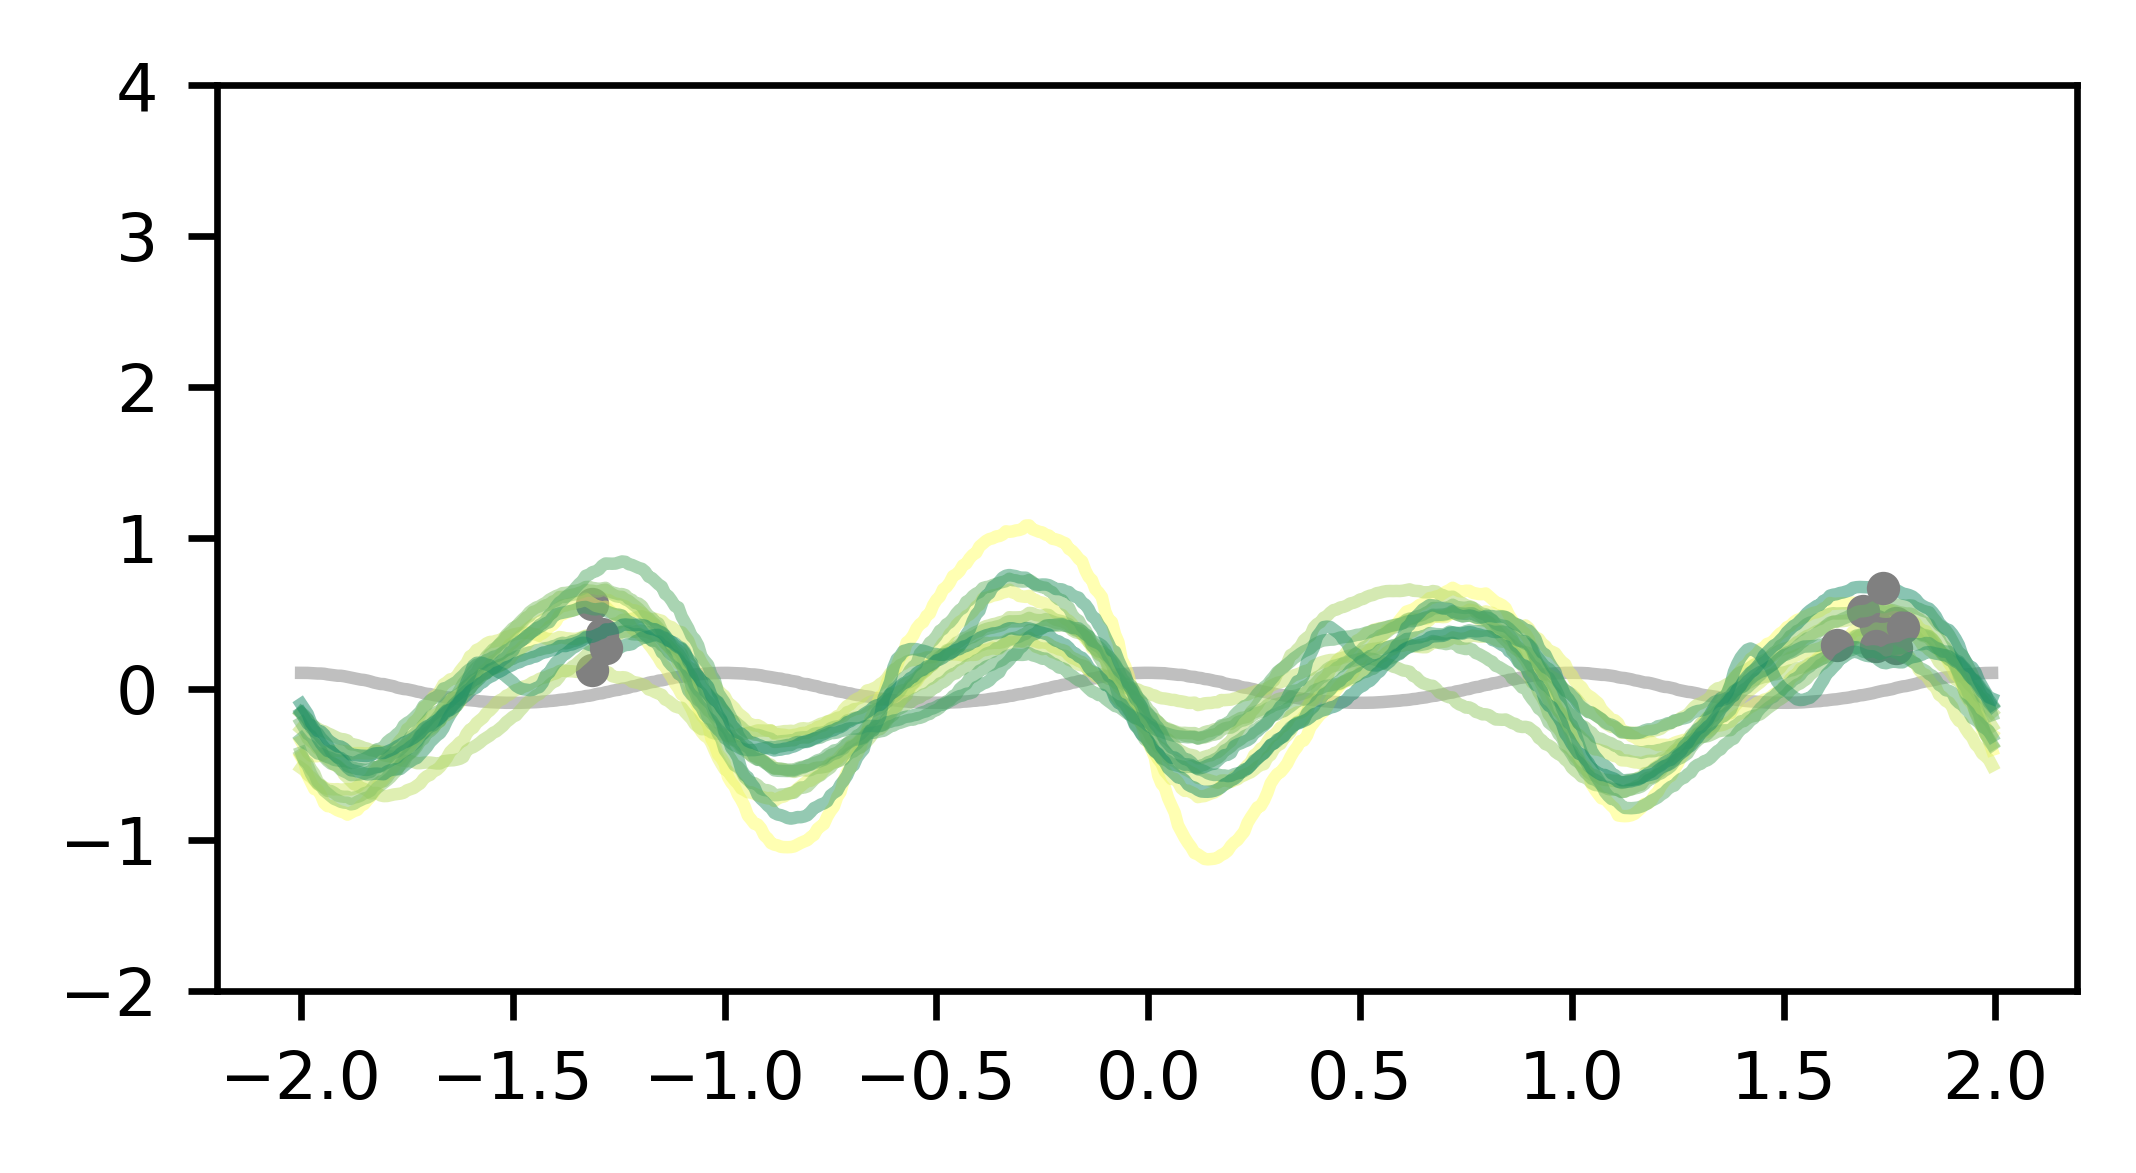

In [35]:
plt.figure(figsize=[4,2])
plt.plot(interface.xarray/(2*np.pi/4), (eta_1D_filtered-1)*4, alpha=0.5, label=r'$\eta(x)k $', color='gray')
for (i,interface) in enumerate(case.interface):
    p_rolled = np.roll(np.average(interface.p, axis=0)/case.tau0, -interface.idx, axis=0)
    plt.plot(interface.xarray/(2*np.pi/4), p_rolled/5, 
             color=plt.cm.get_cmap('summer')(1-i/12), alpha = 0.5)
    plt.plot(interface.xarray[pidx[i]-idx[i]]/(2*np.pi/4), p_rolled[pidx[i]-idx[i]]/5, '.', color='gray')
plt.ylim([-2,4])

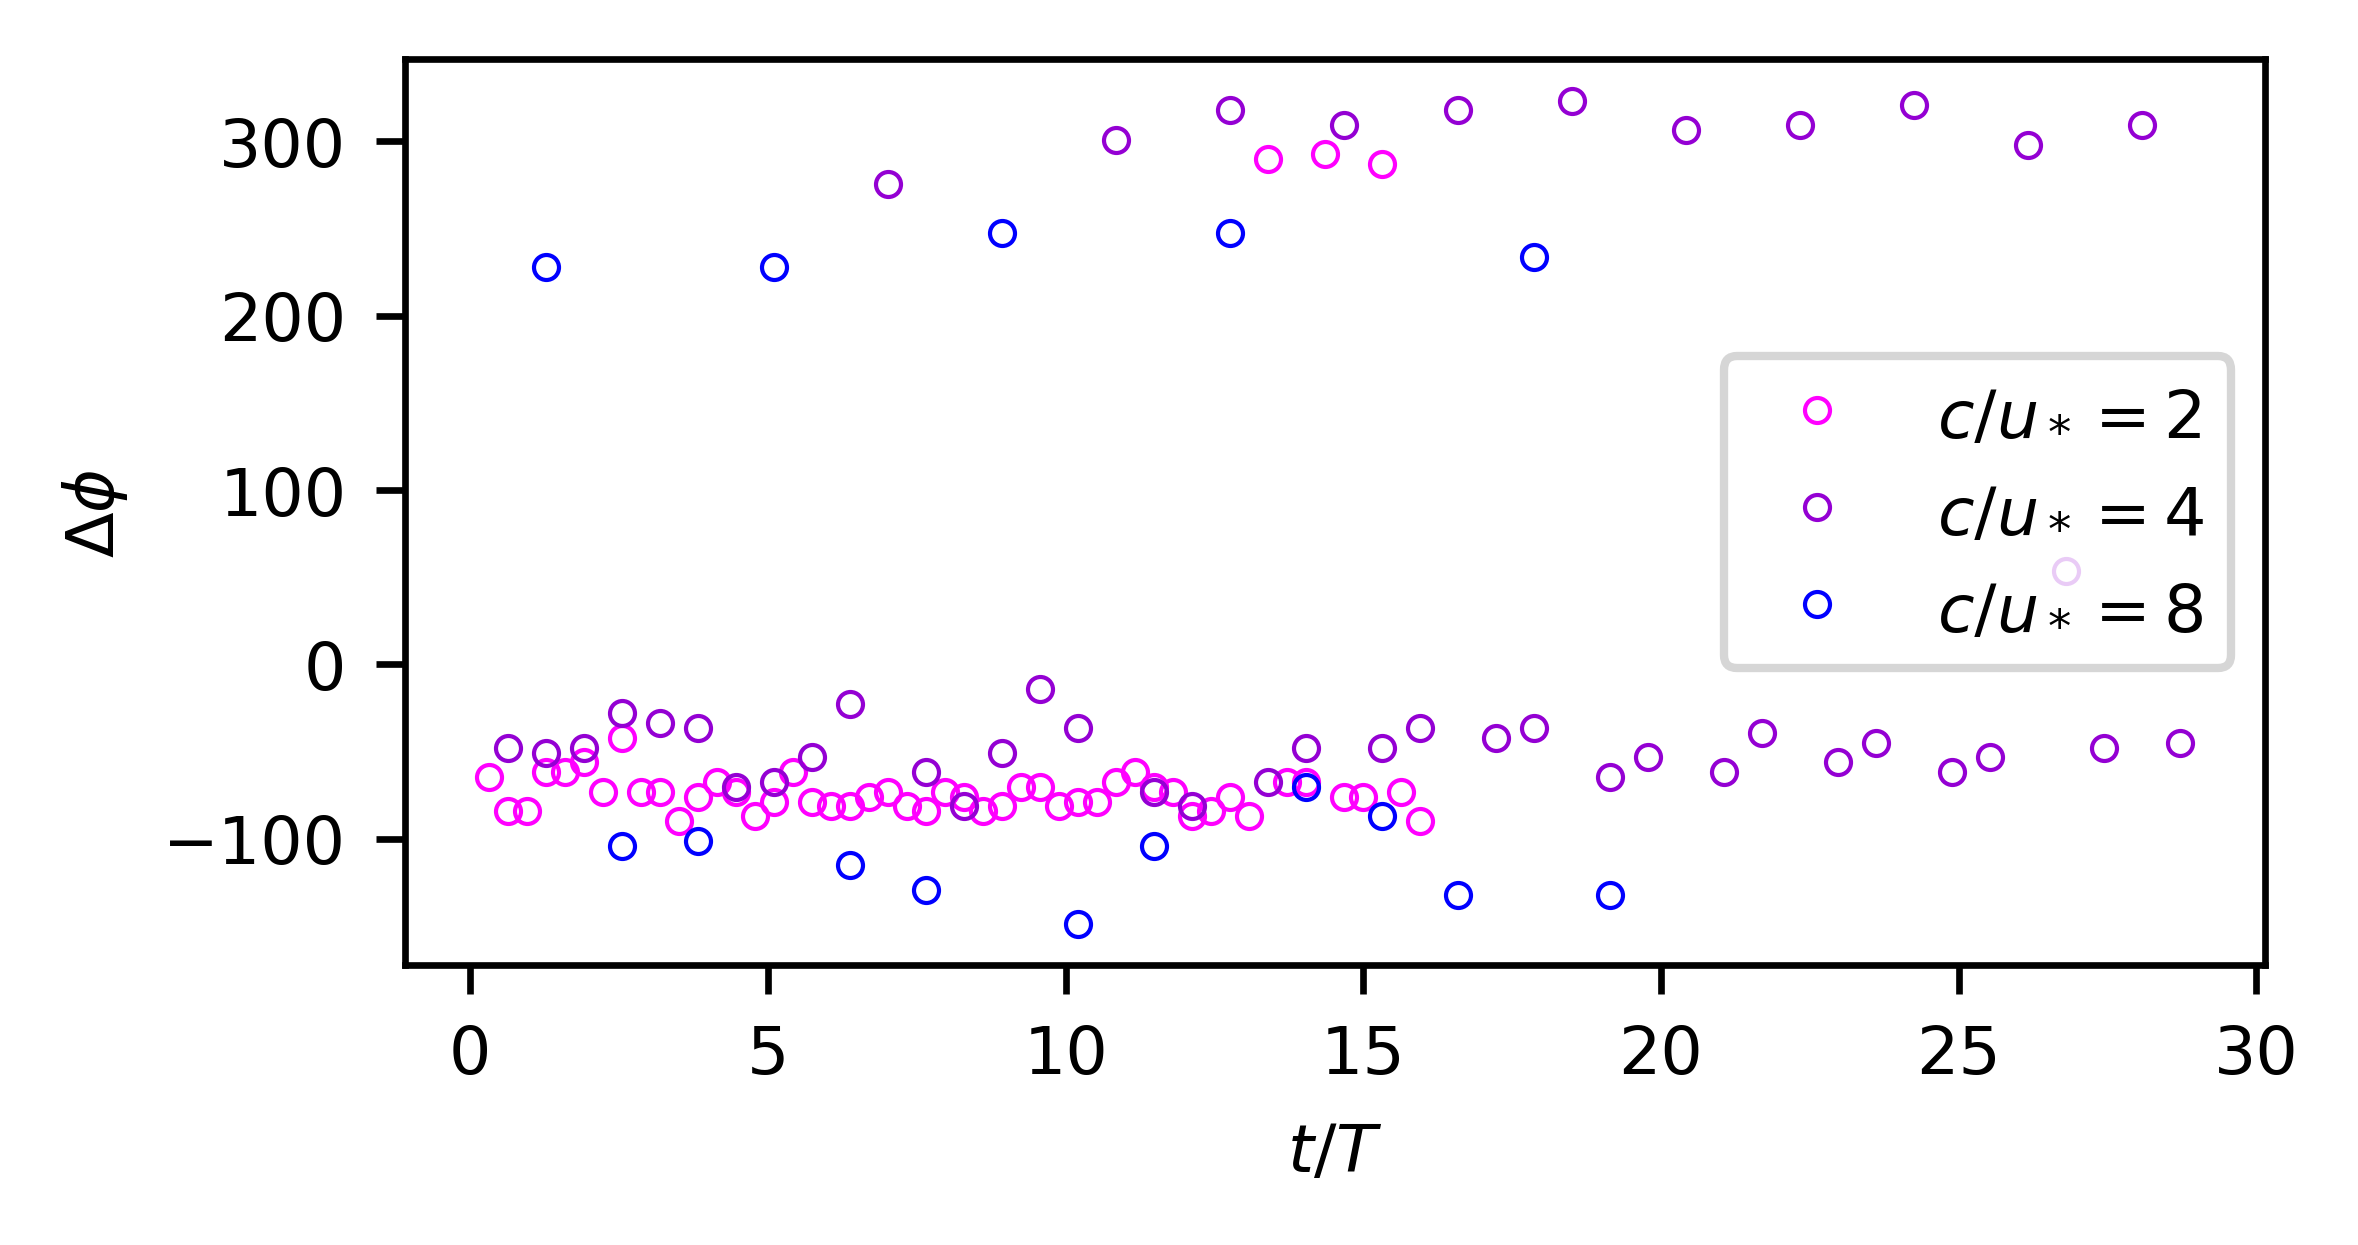

In [67]:
plt.figure(figsize=[4,2])
def plot_pphase (case, color):
    plt.plot(case.t/(2*np.pi/case.wave.omega), (np.array(case.pidx) - np.array(case.idx))/128*360, 
             marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0, 
             color=color, label=r'$c/u_* = %.0f$' %(case.wave.c/case.ustar))
    
for (case, color) in zip((case1,case2,case3),('magenta','darkviolet','blue')):
# for (case, color) in zip((case4,case5,case6),('magenta','darkviolet','blue')):
    plot_pphase(case,color)
    
# plt.ylim([-90,90])
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\Delta \phi$')
plt.legend()

In [ ]:
plt.plot(case.t, (pidx % 128 - idx % 128)/128*360)

In [459]:
## """Write a moving window thing to compute the pressure forcing term and the growth rate (dE/dt directly not the exponential)"""

case = case2
case.t = np.array(case.t)

for j in range(0, np.size(case.t)):
    case.interface[j].stress(case.tau0,case.nu_a)

# List comprehension
formdrag_all = [interface.formdrag for interface in case.interface]
p1d_all = [np.roll(np.average(interface.p/case.tau0, axis=0), -(interface.idx), axis=0) for interface in case.interface]
idx = [interface.idx for interface in case.interface]

case.isample = []
# Ensemble average of different time
p1d_t = []; tau1d_t = []; formdrag_t = []
for j in tqdm(range (2,30,2)):
    p1d_winaver = []; tau1d_winaver = []; formdrag_winaver = []
    case.isample.append(j)
    # Average over 5 time around the center t
    for i in range(j-2,j+3):
        interface = case.interface[i]
        p1d = np.average(interface.p/case.tau0, axis=0)
        p1d_shift = np.roll(p1d, -(interface.idx), axis=0)
        p1d_winaver.append(p1d_shift)
        tau1d = np.average(interface.tau_nux/case.tau0, axis=0)
        tau1d_shift = np.roll(tau1d, -(interface.idx), axis=0)
        tau1d_winaver.append(tau1d_shift)
        formdrag_winaver.append(interface.formdrag)
        
    p1d_t.append(np.average(p1d_winaver, axis=0))
    tau1d_t.append(np.average(tau1d_winaver, axis=0))
    formdrag_t.append(np.average(formdrag_winaver, axis=0))

case.isample = np.array(case.isample)






  0%|          | 0/14 [00:00<?, ?it/s]




100%|██████████| 14/14 [00:00<00:00, 199.21it/s]

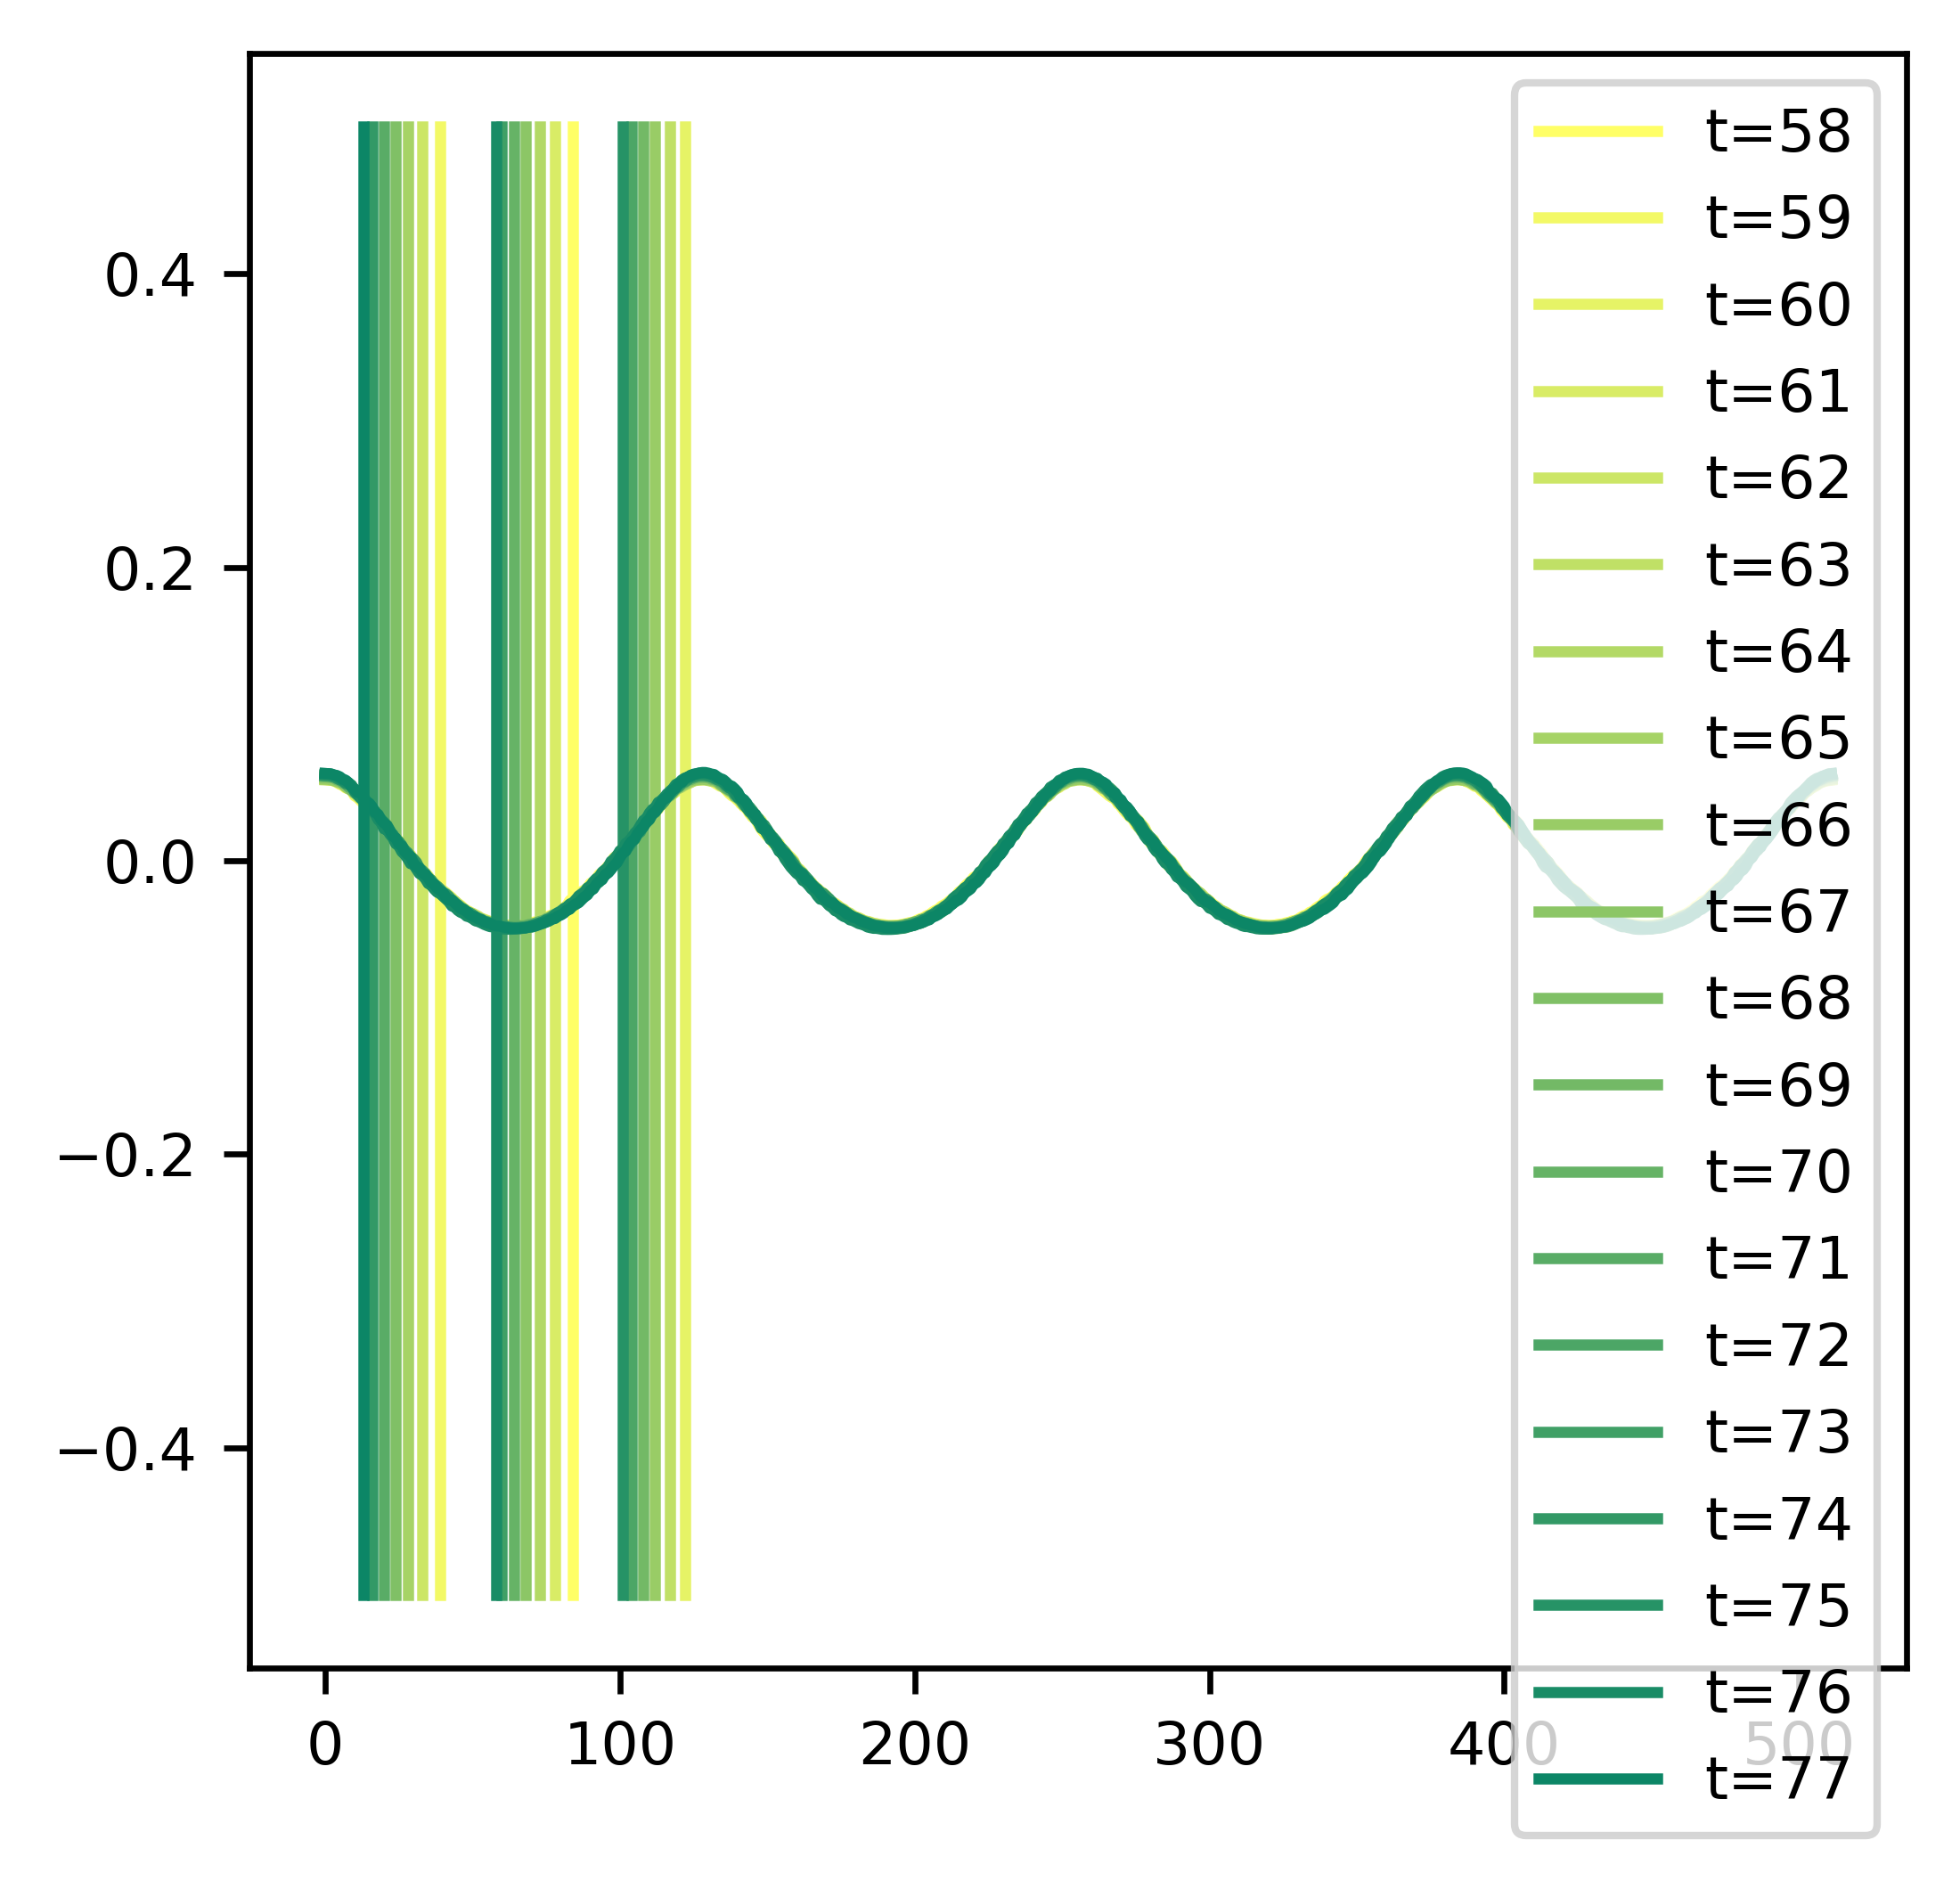

In [462]:
for i in range(0,20):
#     plt.plot(np.average(case.phase['eta'][i], axis=0)-1, label='t=%g' %case.phase['t'][i], color=plt.cm.get_cmap('summer')(1-i/5))
#     plt.plot(np.roll(np.average(case.phase['eta'][i], axis=0), -int(case.phase['idx_theo'][i]), axis=0), label='t=%g' %case.phase['t'][i], color=plt.cm.get_cmap('summer')(1-i/10))
    plt.plot(np.roll(np.average(case.interface[i].eta, axis=0)-1, -int(case.interface[i].idx), axis=0), label='t=%g' %case.tsimu[i], color=plt.cm.get_cmap('summer')(1-i/20))
    plt.plot(np.ones(10)*(case.interface[i].idx % 128), np.linspace(-0.5,0.5,10), color=plt.cm.get_cmap('summer')(1-i/20))
#     plt.plot(np.ones(10)*(case.phase['idx_theo'][i]+128/4), np.linspace(0.8,1.2,10), ':', color=plt.cm.get_cmap('summer')(1-i/10))
plt.legend()

Text(0.5, 1.0, '$u_*/c=0.25$')

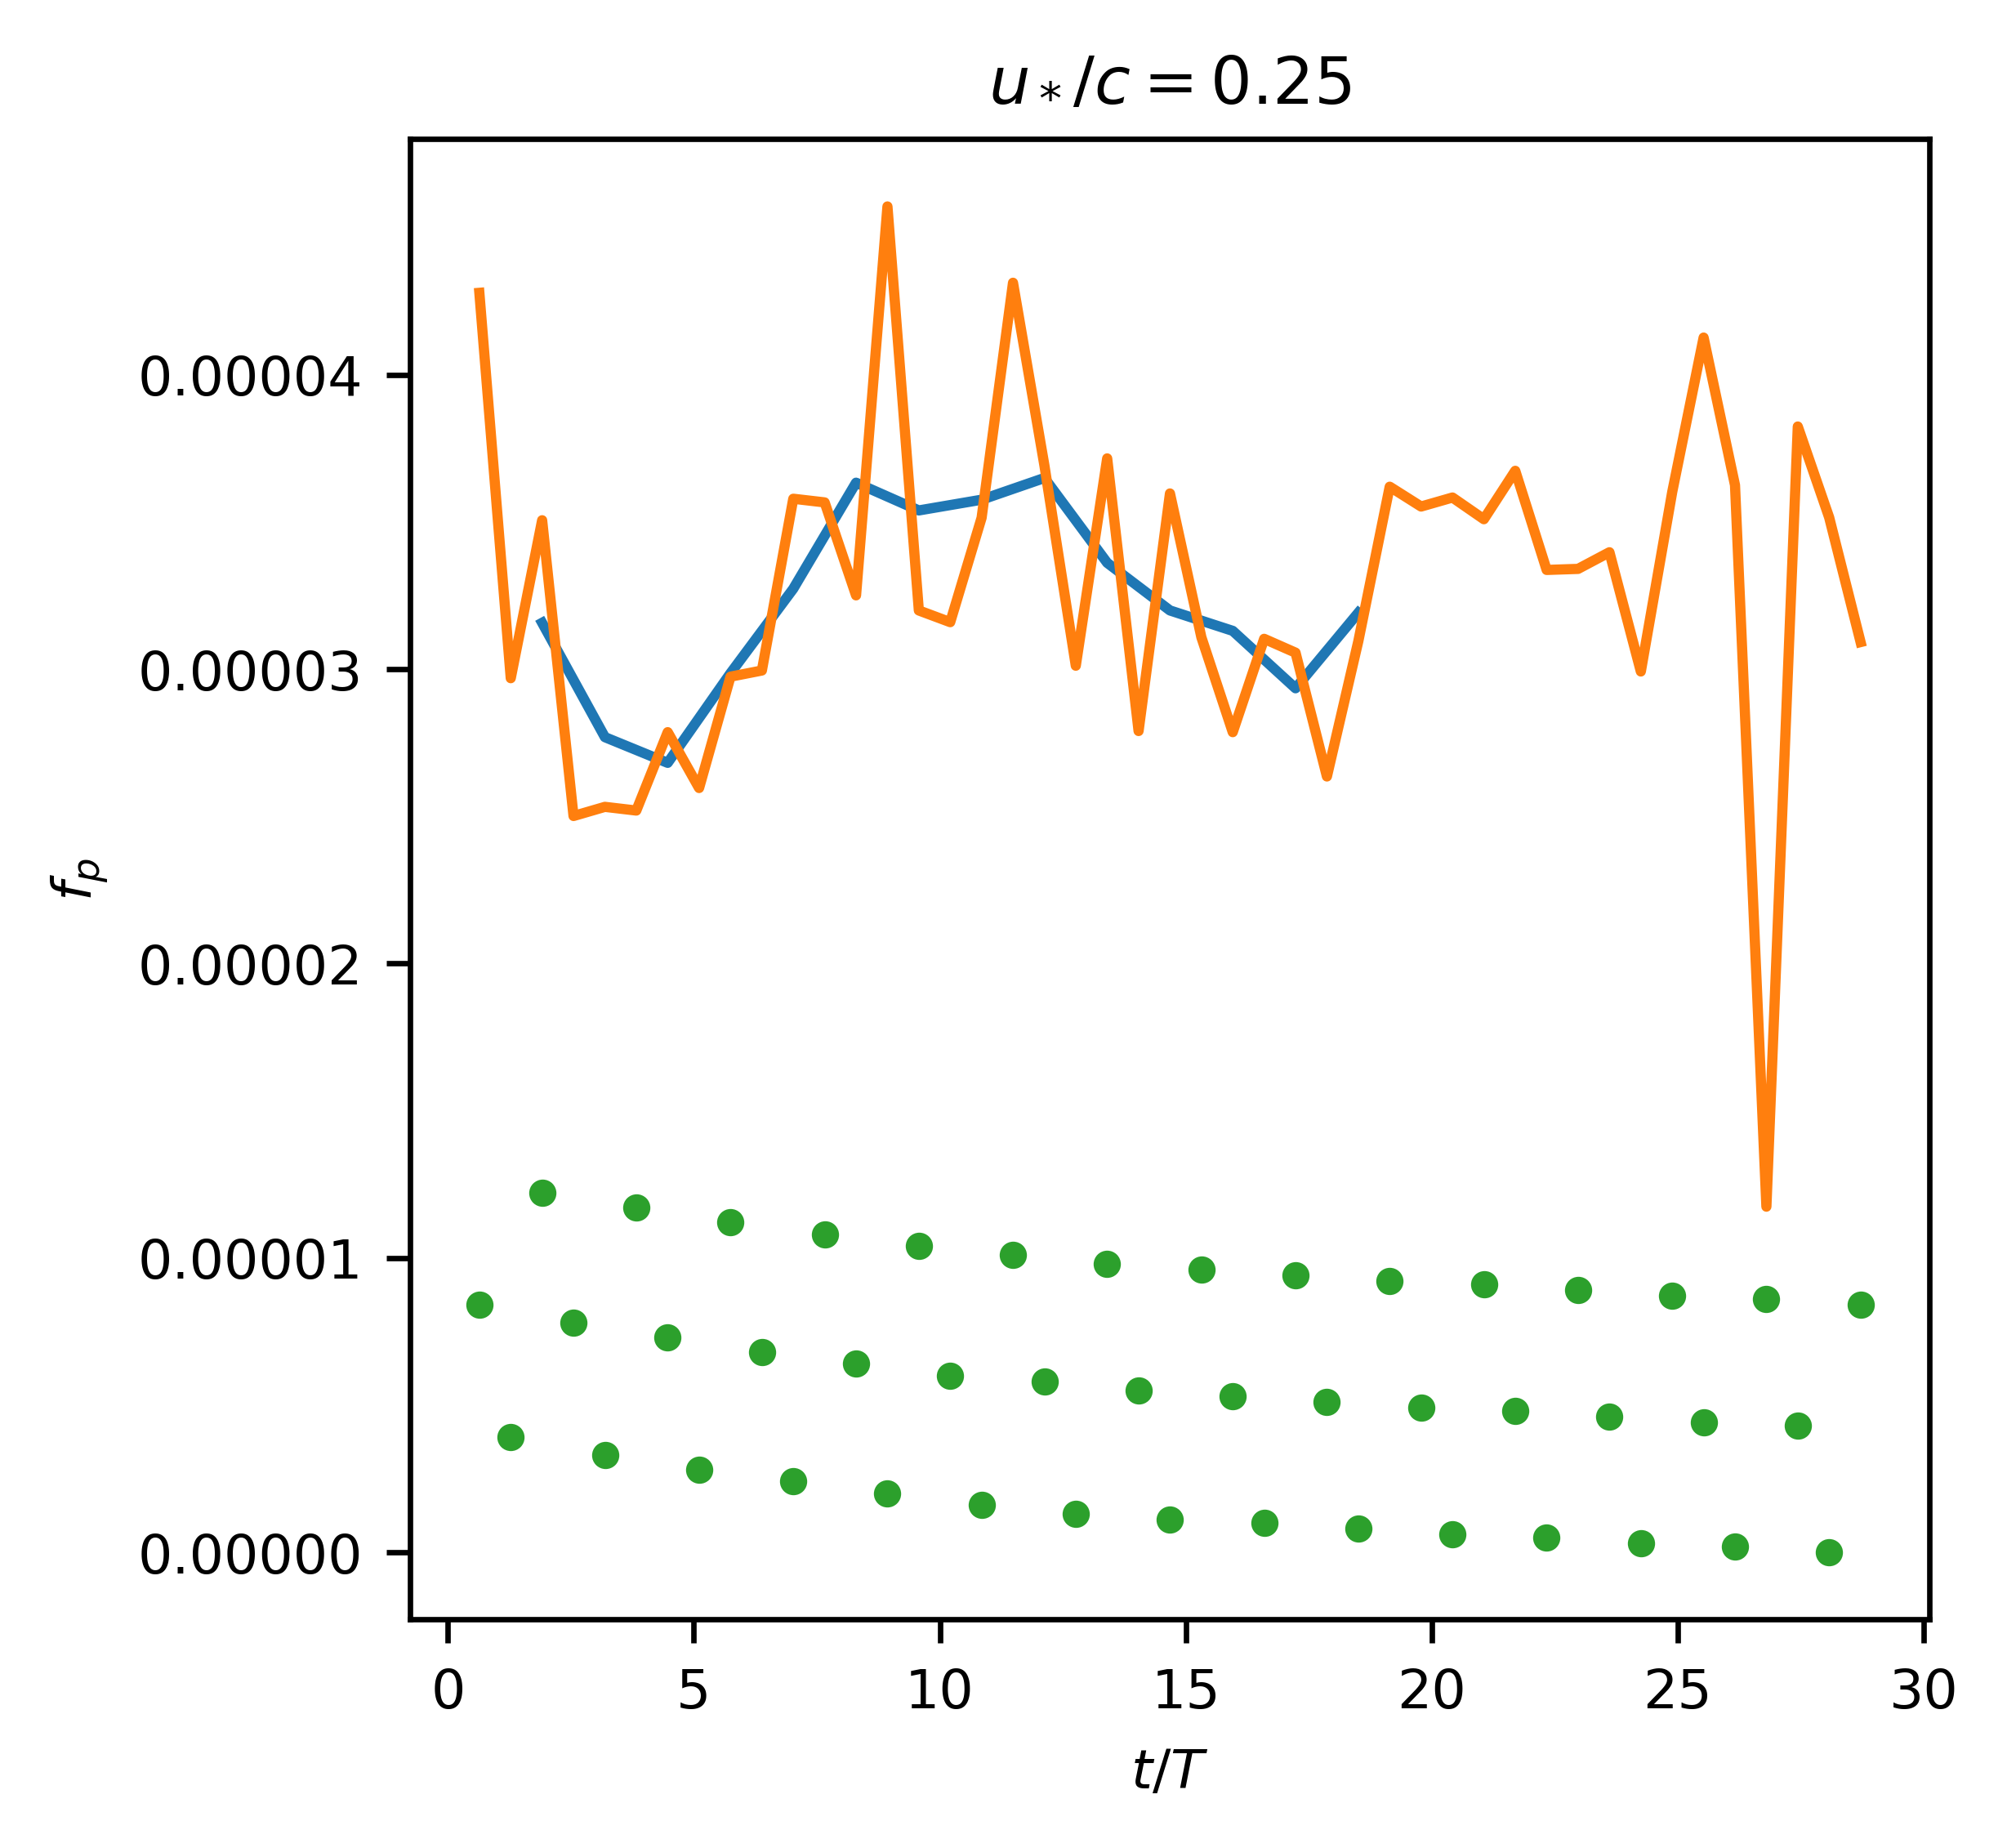

In [460]:
plt.plot(case.t[case.isample]*case.wave.omega/2/np.pi, formdrag_t)
plt.plot(case.t*case.wave.omega/2/np.pi, formdrag_all)
plt.plot(case.t*case.wave.omega/2/np.pi, np.array(idx) % 128 / 10000000, '.')
plt.ylabel(r'$f_p$')
plt.xlabel(r'$t/T$')
plt.title(r"$u_*/c=%.2f$" %(case.ustar/case.wave.c))

NameError: name 'p1d_aver' is not defined

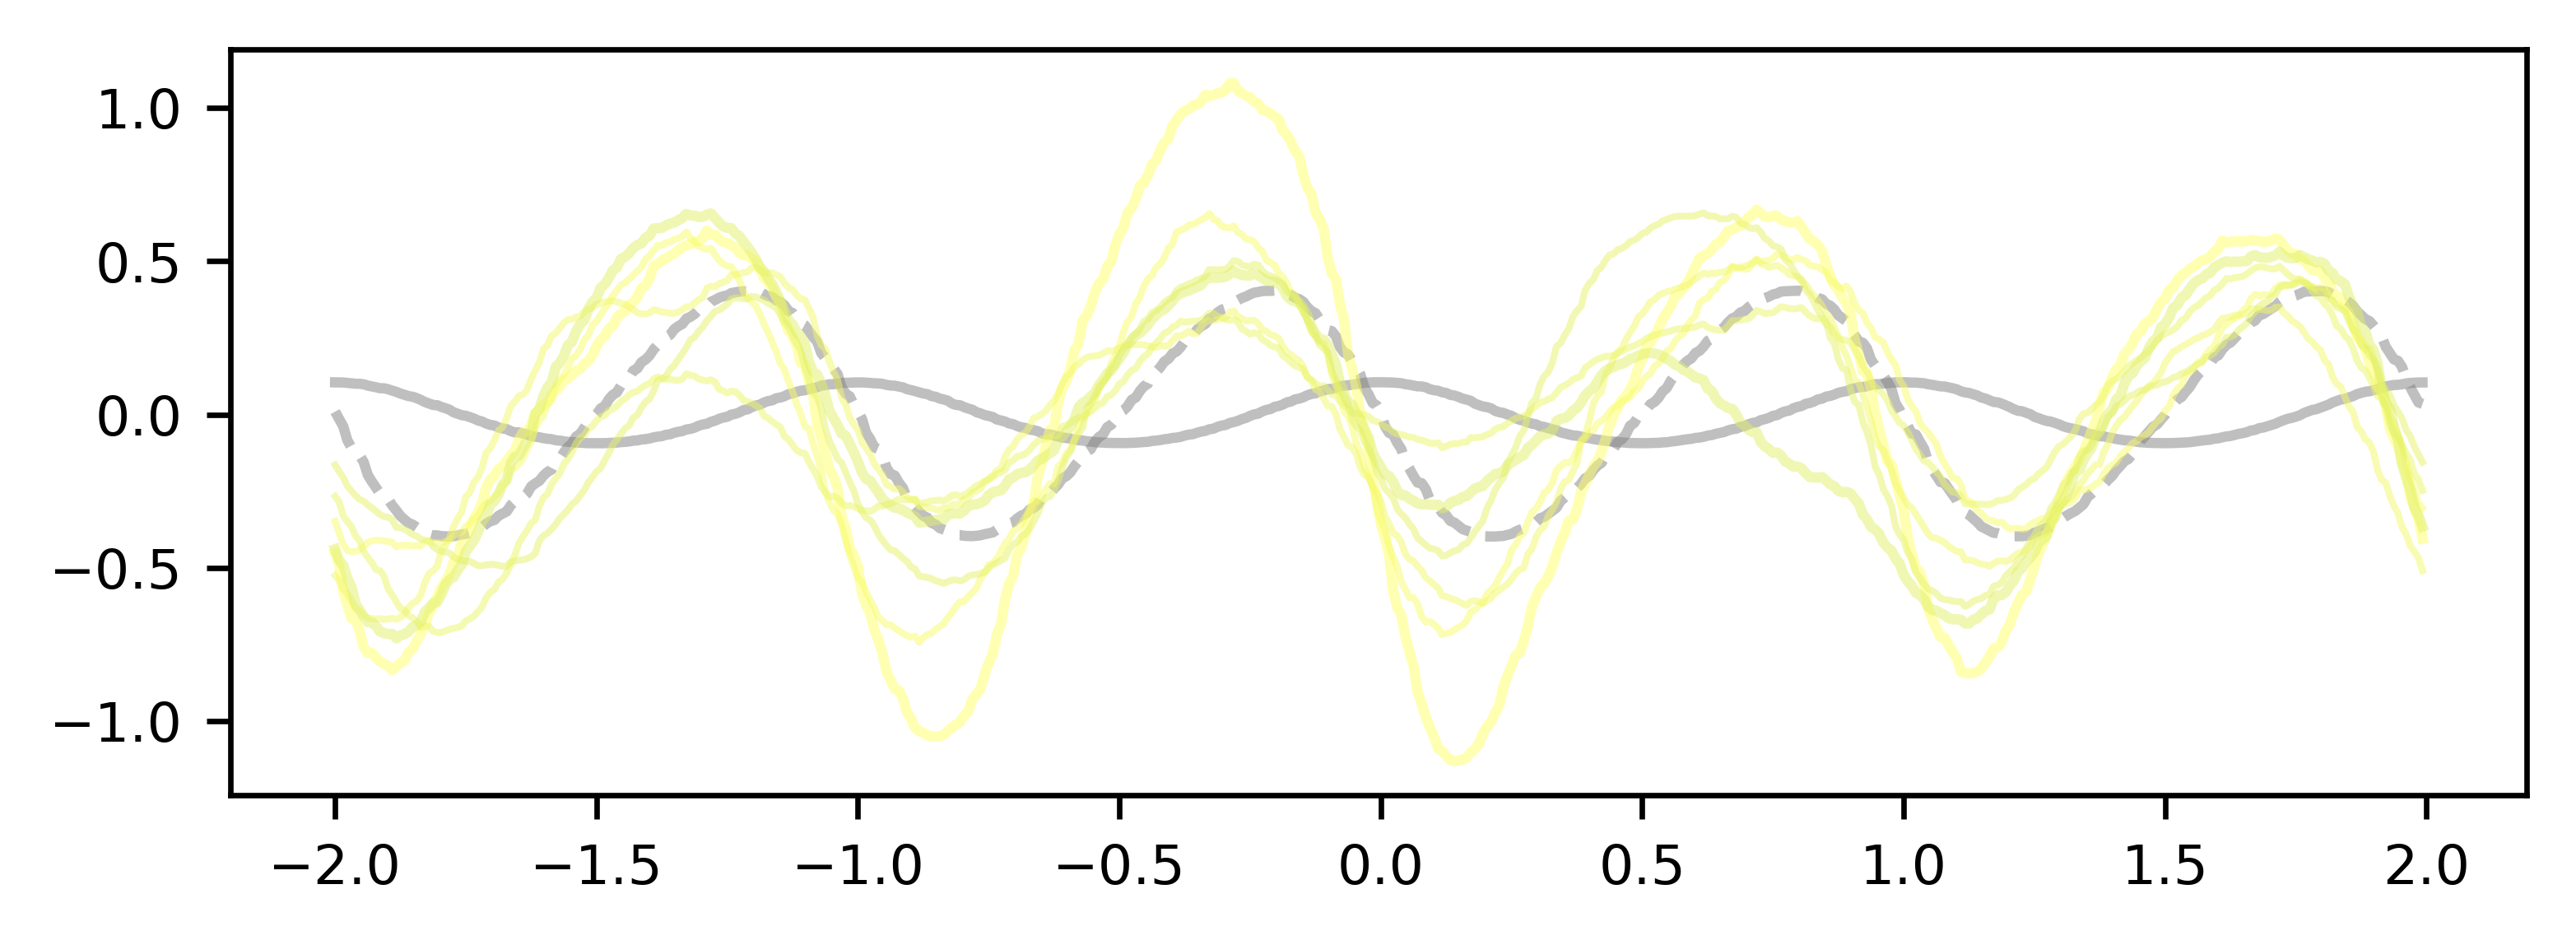

In [13]:
fig = plt.figure(figsize=[6,2]); ax = plt.gca()
L0 = 2*np.pi; N =512
eta_1D_filtered = np.roll(np.average(interface.eta, axis=0), -(interface.idx), axis=0)
deta_dx = np.roll(np.average(interface.grad, axis=0), -(interface.idx), axis=0)
r1 = 0
r2 = 512

plt.plot(interface.xarray[r1:r2]/(2*np.pi/4), (eta_1D_filtered-1)[r1:r2]*4, alpha=0.5, label=r'$\eta(x)k $', color='gray')
plt.plot(interface.xarray[r1:r2]/(2*np.pi/4), deta_dx[r1:r2]*4, '--', alpha=0.5, label=r'$d\eta(x)/dx $', color='gray')
# for (i,p1d) in enumerate(p1d):
#     if i == 0 or i == 17:
#         plt.plot(interface.xarray[r1:r2]/(2*np.pi/4), p1d[r1:r2]/5, label=r'$p_s/5\rho_{a}u_*^2, t = %.1fT$' %(case.t[case.isample[i]]*case.wave.omega/(2*np.pi)), 
#                  color=plt.cm.get_cmap('summer')(1-i/17), alpha = 0.5)
#     else:
#         plt.plot(interface.xarray[r1:r2]/(2*np.pi/4), p1d[r1:r2]/5,
#                  color=plt.cm.get_cmap('summer')(1-i/17), alpha = 0.5) 
for (i,p1d) in enumerate(p1d_all[:-6]):
    if i == 0 or i == 5:
        plt.plot(interface.xarray[r1:r2]/(2*np.pi/4), p1d[r1:r2]/5, label=r'$p_s/5\rho_{a}u_*^2, t = %.1fT$' %(case.t[i]*case.wave.omega/(2*np.pi)), 
                 color=plt.cm.get_cmap('summer')(1-i/40), alpha = 0.5)
    else:
        plt.plot(interface.xarray[r1:r2]/(2*np.pi/4), p1d[r1:r2]/5,
                 color=plt.cm.get_cmap('summer')(1-i/40), alpha = 0.5, lw=1) 
# for (i,tau1d) in enumerate(tau1d_phase_aver):
#     plt.plot(interface.xarray[r1:r2]/(2*np.pi/4), tau1d[r1:r2], label=r'$\tau_{\nu x}/\rho_{a}u_*^2$', color=plt.cm.get_cmap('summer')(1-i/5))

plt.plot(interface.xarray/(2*np.pi/4), p1d_aver/5)

"""Find the phase difference"""
# from scipy.signal import argrelextrema
# maxm1 = argrelextrema(p1d_phase_aver[r1:r2], np.greater)  # (array([1, 3, 6]),)
# maxm2 = argrelextrema(eta_1D_filtered[r1:r2], np.greater)  # (array([1, 3, 6]),)
# x1 = np.ones(20)*(interface.xarray[r1:r2][maxm1[0][5]])/(2*np.pi/4)
# x2 = np.ones(20)*(interface.xarray[r1:r2][maxm1[0][7]])/(2*np.pi/4)
# x1 = np.ones(20)*(-1.2)
# y1= np.linspace(1.4,2.1,20)
# plt.plot(x1,y1,'--', color='k',lw=1)
# x2 = np.ones(20)*(-1)
# y2= np.linspace(0.5,2.1,20)
# plt.plot(x2,y2,'--', color='k',lw=1)
# plt.text(-1.15, 1.8, r'$\Delta\phi$')

plt.ylim([-2,4])
# plt.xlim([-2,2])
# plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')
plt.legend(loc = 'upper right')
# plt.xlabel(r'$xk$')
plt.title(r"$t=%.1f-%.1fT, u_*/c=%.2f$" %(case.t[case.isample[0]]/(2*np.pi/case.wave.omega), case.t[case.isample[-2]]/(2*np.pi/case.wave.omega), (case.ustar/case.wave.c)))

def forward(x):
    return x*360
def back(x):
    return x/360

secax_x2 = ax.secondary_xaxis(-0.15, functions=(forward, back))
ax.annotate(r'$degree$', xy=(1, -0.15), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$x/\lambda$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction')

In [155]:
interface.xarray.size

512

In [376]:
(maxm2[0][0] - maxm1[0][1])/512*360*64

-5445.0

(-2, 4)

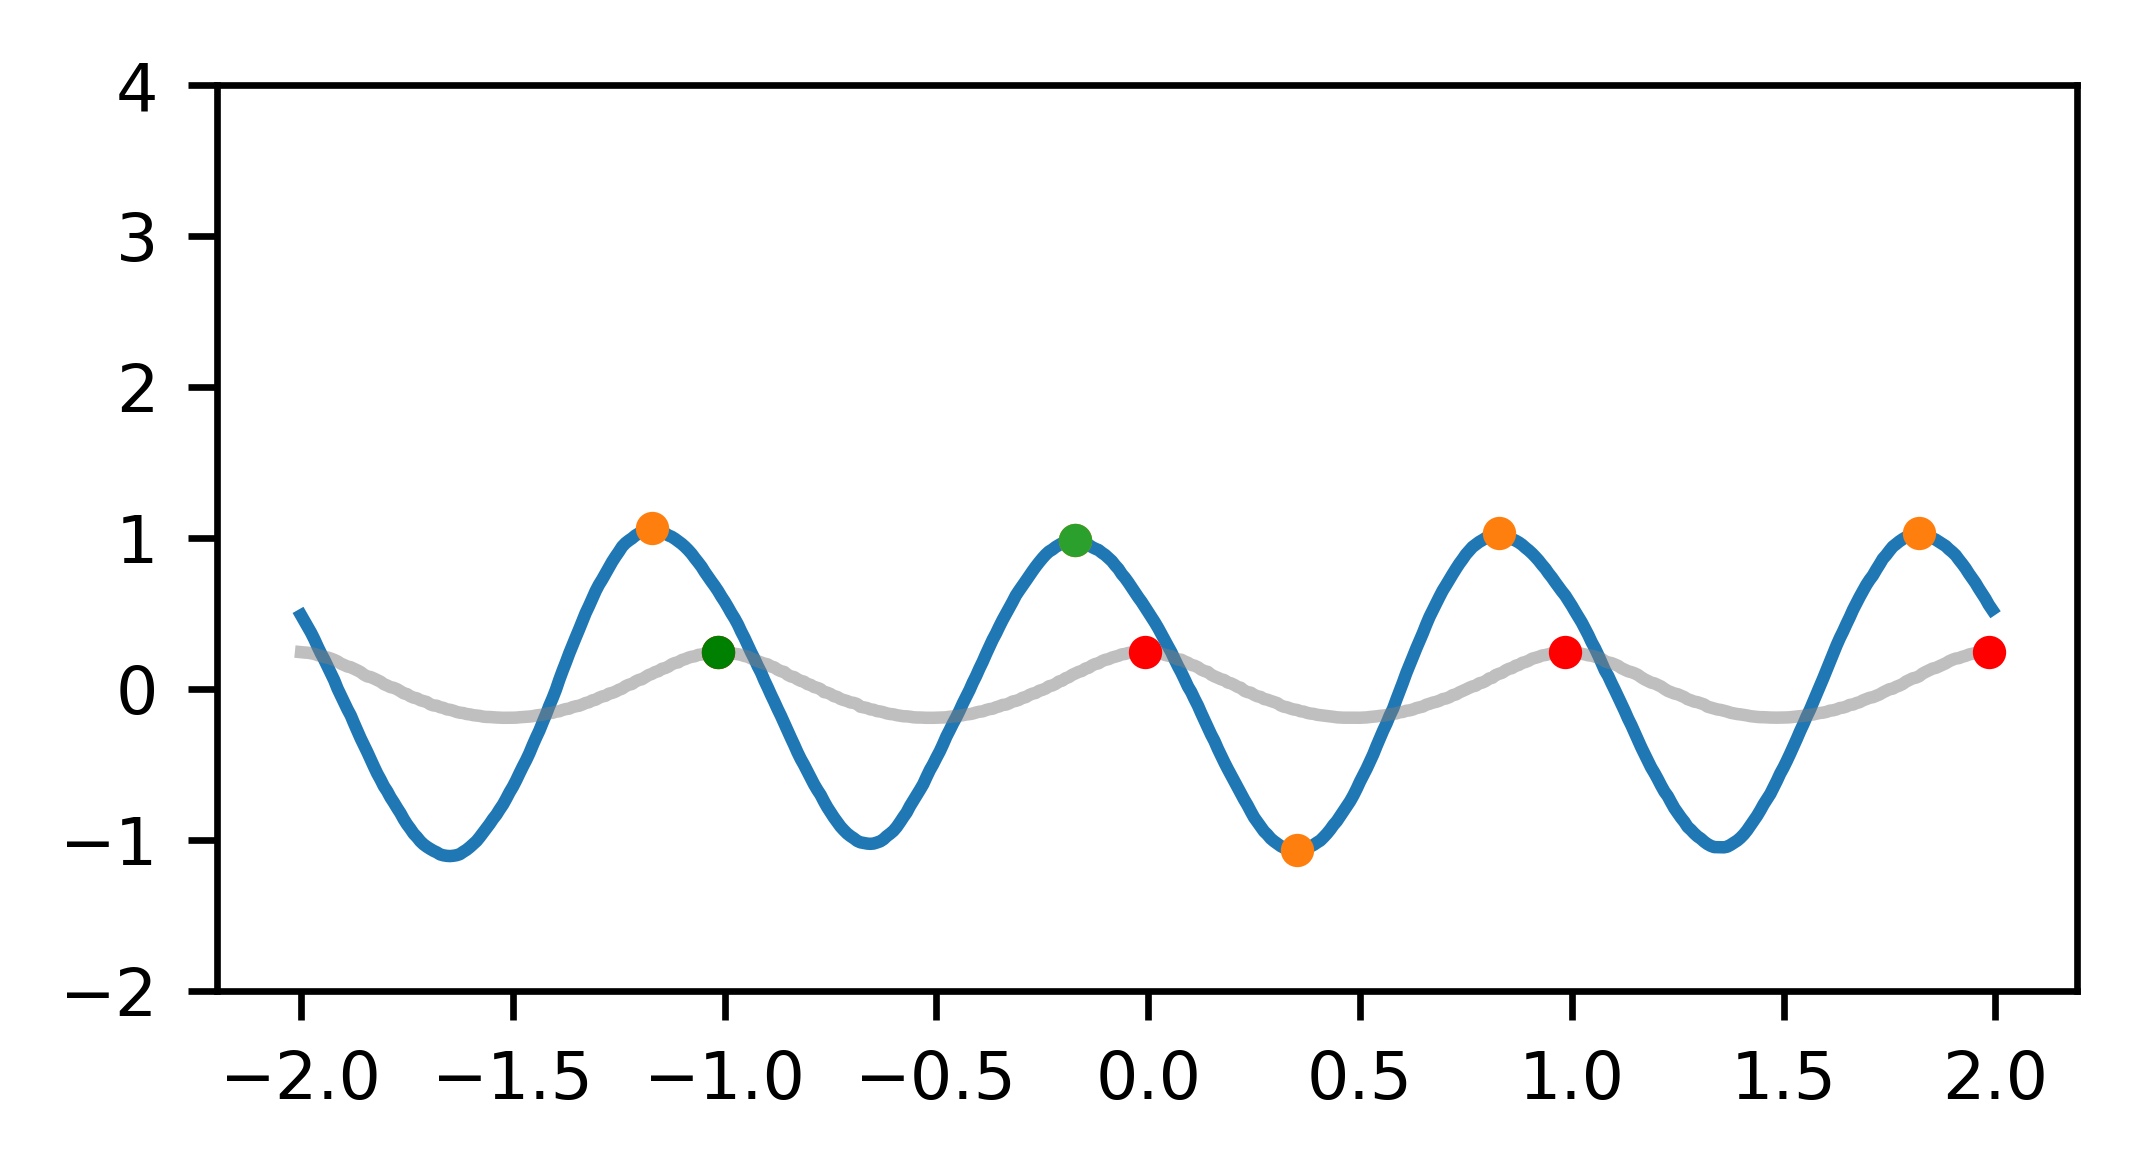

In [434]:
fig = plt.figure(figsize=[4,2])
p1d_aver = np.average(p1d_all[2:-6],axis=0)
from scipy.signal import argrelextrema
maxm1 = argrelextrema(p1d_aver[r1:r2], np.greater)  # (array([1, 3, 6]),)
plt.plot(interface.xarray/(2*np.pi/4), p1d_aver/5)
plt.plot(interface.xarray[maxm1]/(2*np.pi/4), p1d_aver[maxm1]/5, '.')
plt.plot(interface.xarray[maxm1[0][1]]/(2*np.pi/4), p1d_aver[maxm1[0][1]]/5, '.')
plt.plot(interface.xarray/(2*np.pi/4), (eta_1D_filtered-1)*4, alpha=0.5, label=r'$\eta(x)k $', color='gray')
maxm2 = argrelextrema(eta_1D_filtered-1, np.greater)  # (array([1, 3, 6]),)
plt.plot(interface.xarray[maxm2]/(2*np.pi/4), (eta_1D_filtered[maxm2]-1)*4, '.', color='red')
plt.plot(interface.xarray[maxm2[0][0]]/(2*np.pi/4), (eta_1D_filtered[maxm2[0][0]]-1)*4, '.', color='green')
plt.ylim([-2,4])

In [ ]:
"""Fitting the sheltering coefficient"""

In [ ]:
"""Concurrent dissipation and wind input."""

In [167]:
"""Compute the time series of peak frequency energy."""
case = case2
case.Ep = []; case.Erms = []
case.interface = [] # Sampling interface (full information)
for t in tqdm(case.t):
    interface = Interface2D(L0 = case.L0, N = case.N, 
                            path = case.path, pre='eta/eta_loc_t', t = t, PRUNING=True)
    interface.spectrum(peak = 4)
    case.interface.append(interface)
    case.Ep.append(interface.Ep)
    case.Erms.append(np.std(interface.eta)**2)

 10%|█         | 2/20 [00:16<02:25,  8.06s/it]/home/jiarong/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
 15%|█▌        | 3/20 [00:24<02:17,  8.10s/it]/home/jiarong/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
 25%|██▌       | 5/20 [00:40<02:01,  8.13s/it]/home/jiarong/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
 30%|███       | 6/20 [00:49<01:55,  8.23s/it]/home/jiarong/anaconda3/lib/pytho

In [185]:
case = case1
case.Ep = np.array(case.Ep); case.Erms = np.array(case.Erms)
case.t = np.array(case.t-case.tstart)

In [184]:
case1.tstart = 57